<a href="https://colab.research.google.com/github/RusMermaid/Data_science_course_teaching/blob/main/L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

pd.options.mode.chained_assignment = None

# Первичный анализ данных

Директор огромного санатория для подростков хочет прикинуть бюджет на питание, понять какие типы питания нужны в санатории, какие витамины, итд.  

Он запросил данные и ему выдали список: там только рост и вес подростков. 

Он приглашает специалиста по дата сайнс (то есть, вас)  и просит разобраться в данных и представить короткий отчет, дающий представление о том какие дети находятся в санатории.

Давайте вместе попробуем совершить этот анализ

Прежде всего, прочитаем данные, где собраны рост и вес подростков

In [ ]:
df = pd.read_csv('teens_h_w.csv')

Теперь наши данные прочитаны в таблицу датафрейм библиотеки Pandas.


Посмотрим, сколько там представлено людей? 

In [ ]:
print('число строк в таблице - ', len(df))

число строк в таблице -  25002


25 тысяч - это немало!

посмотрим на них.

В данных есть 3 поля:

    Index - номер по порядку
    Height - рост
    Weight - вес


In [ ]:
df.head(5)

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


сразу видна странность в цифрах. 
Вес 112 кг при росте 67 см? 
Невозможно!

Догадка: единицы измерения другие, скорее всего, это дюймы и фунты.

Погуглим:

1 фунт - 453,592г

1 дюйм - 2.54 см

Чтобы нам было привычнее, добывим новые колонки в таблицу - пересчитаем наши данные в сантиметры и килограммы:

In [ ]:
df['height_sm']  = 0
df['weight_kg'] = 0
df['height_sm'] = df['Height'].apply(lambda x: x*2.54)
df['weight_kg'] = df['Weight'].apply(lambda x: x*0.453592)

опять посмотрим на данные

In [ ]:
df.head(5)

,Index,Height,Weight,height_sm,weight_kg
0,1,65.78331,112.9925,167.089607,51.252494
1,2,71.51521,136.4873,181.648633,61.909547
2,3,69.39874,153.0269,176.272800,69.411778
3,4,68.21660,142.3354,173.270164,64.562199
4,5,67.78781,144.2971,172.181037,65.452010


теперь колонки в см и кг выглядят гораздо понятнее

## Итак, что мы можем узнать из этих данных?

Прежде всего посмотрим на средние значения роста и веса наших подростков.

Чтобы посчитать среднее арифметическое значение величины нужно
сложить все величины
и полученную сумму разделить на число слагаемых.

In [ ]:
print('среднее значение роста в см -', df['height_sm'].mean())
print('среднее значение веса в кг -', df['weight_kg'].mean())

среднее значение роста в см - 872.4949602658505
среднее значение веса в кг - 57.642008891370374


какое удивительное среднее значение роста!
872 см - больше 8 метров!

Как такое может быть?

Давайте посмотрим на максимальное и минимальное значение роста в см:

In [ ]:
print('минимальное значение роста в см -', df['height_sm'].min())
print('максимальное значение роста в см -', df['height_sm'].max())

минимальное значение роста в см - 153.1070344
максимальное значение роста в см - 17494912.94


похоже, здесь какая-то ошибка, максимальный рост - 174 км!

а как это было в дюймах?

In [ ]:
print('минимальное значение роста в дюймах -', df['Height'].min())
print('максимальное значение роста в дюймах -', df['Height'].max())

минимальное значение роста в дюймах - 60.27836
максимальное значение роста в дюймах - 6887761.0


кажется, все ясно! 
Сборщик данных явно забыл поставить десятичную точку, когда вводил значение роста.
Вот и получилось такое огромное число.

Ошибки в данных бывают очень часто, за этим надо следить и учитывать.

Такие странные значения в данных называются выбросами.
Выбросы могут появиться в результате 
 - ошибки сборщика данных 
 - или из-за присутствия в нашей выборке, действительно необычных данных. Например, если в группе подростков обычного роста есть один баскетболист с ростом 2 м.

Выбросы смещают среднее значение, делают его менее осмысленным.

Как бороться с этим, и более адекватно оценить среднее значение роста?

1. Упорядочим всех подростков по росту и выберем рост человека, стоящего посередине.

    Это значение роста называется Медиана.

    Медиана почти не зависит от редких выбросов.

Посчитаем медианы роста и веса

Видите, они уже гораздо более осмысленны:

In [ ]:
print('медиана роста в см -', df['height_sm'].median())
print('медиана веса в кг -', df['weight_kg'].median())

медиана роста в см - 172.7097003
медиана веса в кг - 57.6772618664


2. Мы можем поправить это ошибочное значение роста и заново пересчитать рост в см

In [ ]:
df.loc[df['Height'] == 6887761.0, ['Height']] = 68.877610

df.loc[df['Height'] == 68.877610, ['height_sm']] = 68.877610*2.54


Мы исправили выброс, давайте посмотрим, как изменилось следнее значение роста и его медиана:

In [ ]:
print('среднее значение роста в см -', df['height_sm'].mean())
print('медиана роста в см -', df['height_sm'].median())

среднее значение роста в см - 172.76141931430286
медиана роста в см - 172.7097003


Теперь они почти равны друг другу!

Проверим еще раз максимальное значение роста:

In [ ]:
print('максимальное значение роста в см -', df['height_sm'].max())

максимальное значение роста в см - 1643.34317


Что такое, опять странное значение - больше 16 метров!

Давайте применим радикальный способ.

3. давайте ограничим в таблице рост каким-то разумным значением. 

    Иногда приходится использовать Google, чтобы выбрать разумные ограничения на величину, но в данном случае мы и так в курсе.
    
    Будем считать, что подростков выше 2х метров не бывает. 

In [ ]:
df = df[df['height_sm'] < 200]

еще раз посмотрим на максимальный рост, среднее значение и медиану роста в наших данных:

In [ ]:
print('максимальное значение роста в сантиметрах -', df['height_sm'].max())

максимальное значение роста в сантиметрах - 190.888112


Еще раз посмотрим на среднее и медиану

In [ ]:
print('среднее значение роста в см -', df['height_sm'].mean())
print('медиана роста в см -', df['height_sm'].median())

среднее значение роста в см - 172.7025983971121
медиана роста в см - 172.7096368


Обратите внимание - мы убрали из данных такой огромный выброс - 16-метрового человека.

А среднее значение при этом, почти не изменилось.

Почему так получилось?
Подумайте об этом дома.

Хорошо, теперь мы знаем, что:
    
    средний рост подростков в нашем наборе примерно 172 см, 
    а средний вес - примерно 57 кг.

Вроде, обычный рост и вес. Так и скажем директору - что ничего особенного не нужно?

Но достаточно ли мы выяснили?

Возраст людей в списке не указан, там могут быть люди от 13 до 19 лет, от еще детей до почти взрослых.

А мы знаем только средние значения их роста и веса.

## Представим себе что к нам обратились еще 2 директора из двух соседних санаториев. Они выдали нам свои аналогичные списки и попросили сделать выводы.

Давайте загрузим новые данные в две дополнительные таблицы - df_1 и df_2.

In [ ]:
df_1 = pd.read_csv('teens_h_w_1.csv')
df_2 = pd.read_csv('teens_h_w_2.csv')

Теперь посмотрим посмотрим на средние и медианы роста и веса во всех трех группах:

In [ ]:
print('основная таблица: среднее значение роста в см -', df['height_sm'].mean())
print('первая дополнительная таблица: среднее значение роста в см -', df_1['height_sm'].mean())
print('вторая дополнительная таблица: среднее значение роста в см -', df_2['height_sm'].mean())
print()

print('основная таблица: медиана роста в см -', df['height_sm'].mean())
print('первая дополнительная таблица: медиана роста в см -', df_1['height_sm'].median())
print('вторая дополнительная таблица: медиана роста в см -', df_2['height_sm'].median())
print()

print('основная таблица: среднее значение веса в кг - ', df['weight_kg'].mean())
print('первая дополнительная таблица: среднее значение веса в кг -', df_1['weight_kg'].mean())
print('вторая дополнительная таблица: среднее значение веса в кг -', df_2['weight_kg'].mean())
print()

print('основная таблица: медиана веса в кг - ', df['weight_kg'].mean())
print('первая дополнительная таблица: медиана веса в кг -', df_1['weight_kg'].median())
print('вторая дополнительная таблица: медиана веса в кг -', df_2['weight_kg'].median())


основная таблица: среднее значение роста в см - 172.7025983971121
первая дополнительная таблица: среднее значение роста в см - 172.94483657240212
вторая дополнительная таблица: среднее значение роста в см - 172.09205890152657

основная таблица: медиана роста в см - 172.7025983971121
первая дополнительная таблица: медиана роста в см - 172.9142846
вторая дополнительная таблица: медиана роста в см - 166.7276066

основная таблица: среднее значение веса в кг -  57.642168793942886
первая дополнительная таблица: среднее значение веса в кг - 57.727124582625756
вторая дополнительная таблица: среднее значение веса в кг - 57.36167997355014

основная таблица: медиана веса в кг -  57.642168793942886
первая дополнительная таблица: медиана веса в кг - 57.720375786000005
вторая дополнительная таблица: медиана веса в кг - 57.3726294792


Обратите внимание, что средние и медианы по росту и весу в этих группах достаточно похожи.

Можно ли сказать, что эти 3 группы примерно одинаковые и для всех 3х групп можно принимать одинаковые решения?

## Чтобы ответить на этот вопрос давайте познакомимся с таким способом отображения данных, как гистограмма.

Гистограмма, это такой график, где по оси X отложены интервалы в которые попадает величина, а по оси Y - количество попаданий в эти интервалы.

Например построим по нашим данным основной таблицы гистограмму роста подростков:

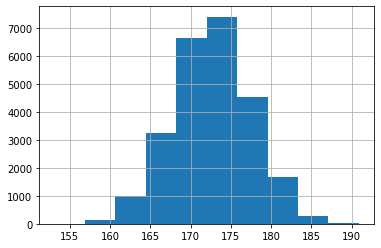

In [ ]:
df['height_sm'].hist()

Мы видим, что в наших данных больше всего подростков имеют рост между 170 и 175 см. Таких людей около 7500.

Вспомним, что среднее значение и медиана роста, которые мы считали раньше - примерно равны  172.7 см.

Обратите внимание, что это значение тоже попадает в этот самый частый интервал.

А с ростом 165 - 167 см уже только чуть больше 3000 человек.

С ростом больше 185 см уже совсем мало людей.

Теперь построим рядом гистограммы для всех 3х наборов:

(array([   9.,  136., 1003., 1839.,    0.,    0.,  444., 1681.,  291.,
          34.]), array([153.1070344 , 156.88514216, 160.66324992, 164.44135768,
        168.21946544, 171.9975732 , 175.77568096, 179.55378872,
        183.33189648, 187.11000424, 190.888112  ]), <a list of 10 Patch objects>)

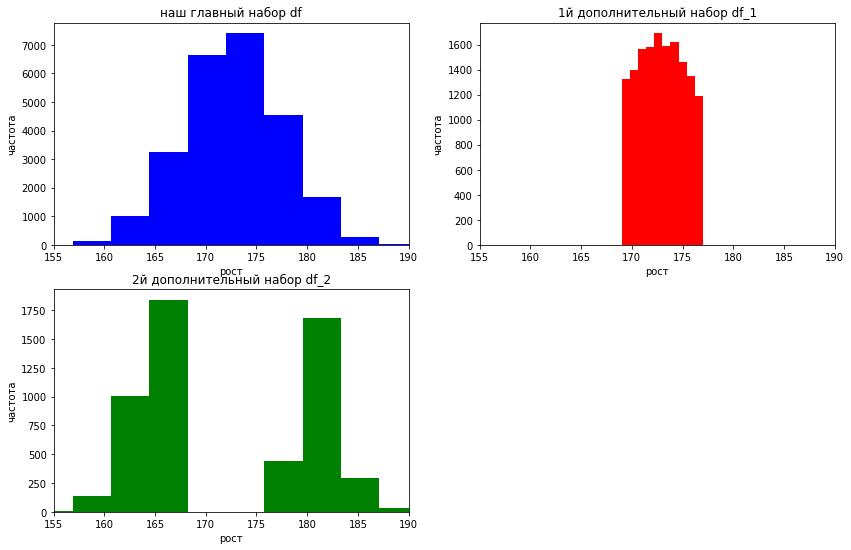

In [ ]:
plt.figure(figsize=(14, 9))

plt.subplot(2, 2, 1)

plt.title("наш главный набор df")
plt.xlabel("рост")
plt.ylabel("частота")
plt.xlim(xmin=155, xmax=190)
plt.hist(df['height_sm'], color='blue')

plt.subplot(2, 2, 2)
plt.title("1й дополнительный набор df_1")
plt.xlabel("рост")
plt.ylabel("частота")
plt.xlim(xmin=155, xmax=190)
plt.hist(df_1['height_sm'], color='red')

plt.subplot(2, 2, 3)
plt.title("2й дополнительный набор df_2")
plt.xlabel("рост")
plt.ylabel("частота")
plt.xlim(xmin=155, xmax=190)
plt.hist(df_2['height_sm'], color='green')


Синяя гистограмма - наш главный набор.
По гистограмме видно, что в наборе присутствуют разные люди с ростом примерно от 155 до 190 см. 
Больше всего людей с ростом близким к среднему - около 172 см.
Этот набор очень разнообразный.

Красная гистограмма - наш 1й дополнительный набор.
Видно, что в наборе находятся люди с очень близким ростом: от 169 до 177.
Их явно отбирали специально, возможно по возрасту или по другому признаку.

Зеленая гистограмма - наш 2й дополнительный набор.
Это очень интересный случай.
Обратите внимание, здесь ВООБЩЕ нет людей с ростом, близким к среднему.
Похоже, что людей в этот набор специально отбирали.
Возможно там есть младшие подростки и старшие - их вожатые. 
Этот набор лучше разбить на 2 по явным группам и изучать их по отдельности.

## Вывод: совсем разные  наборы данных могут иметь близкие средние значения. Нужны еще другие показатели, чтобы различать эти ситуации


Давайте изучим еще несколько показателей, которые могут нам дать представление о нашем наборе данных.

Стандартное отклонение.
Этот показатель помогает оценить насколько наши данные разные, то есть - отклоняются от среднего.

Чтобы посчитать стандартное отклонение для роста в нашем наборе нужно:

    для каждого человека посчитать разность между его ростом и средним ростом
    эту разность возвести в квадрат
    все эти квадраты разностей сложить
    полученную сумму поделить на число людей минус 1
    и извлечь из результата квадратный корень


В библиотеке Pandas мы можем посчитать стандартное отклонение с помощью функции std() (standart deviation).

Посчитаем стандартное отклонение для роста и веса в наших 3х наборах.

In [ ]:
print('основная таблица: стандартное отклонение роста -', df['height_sm'].std())
print('основная таблица: стандартное отклонение веса -', df['weight_kg'].std())

основная таблица: стандартное отклонение роста - 4.830188370823756
основная таблица: стандартное отклонение веса - 5.289187844011748


In [ ]:
print('первая дополнительная таблица: стандартное отклонение роста -', df_1['height_sm'].std())
print('первая дополнительная таблица: стандартное отклонение веса -', df_1['weight_kg'].std())

первая дополнительная таблица: стандартное отклонение роста - 2.2005659881100947
первая дополнительная таблица: стандартное отклонение веса - 4.720393717783551


видно что отклонения в этом наборе меньше, то есть, выборка менее разнообразна, что мы и видели на красной гистограмме.

In [ ]:
print('вторая дополнительная таблица: стандартное отклонение роста -', df_2['height_sm'].std())
print('вторая дополнительная таблица: стандартное отклонение веса -', df_2['weight_kg'].std())

вторая дополнительная таблица: стандартное отклонение роста - 8.49238180944819
вторая дополнительная таблица: стандартное отклонение веса - 6.5530779180120575


видно что отклонения в этом наборе гораздо выше. 
Это позволяет заподозрить две разных группы людей в выборке

Что мы и видели на зеленой гистограмме.

Квантили

Вспомните, как мы считали медиану. Мы упорядочивали детей по росту и выбирали человека ровно посередине ряда. То есть, разбивали данные так, чтобы слева и справа было одинаковое количество участников.
Медиану можно по другому назвать квантиль 50%

Полезно еще смотреть и на другие квантили.
Например, если мы: 

    выстроим детей в ряд по росту
    разделим ряд на 4 равные части
    и возьмем человека, отделяющего одну часть слева от 3х частей справа
    это будет квантиль 25%.
    А если человек, будет отделять 3 части слева от 1й части справа
    это будет квантиль 75%
    

посчитаем несколько квантилей для наших данных:

In [ ]:
print('основная таблица: квантиль 50% е роста -', df['height_sm'].quantile(q=0.5) )
print('основная таблица: квантиль 25% е роста -', df['height_sm'].quantile(q=0.25) )
print('основная таблица: квантиль 75% е роста -', df['height_sm'].quantile(q=0.75))

основная таблица: квантиль 50% е роста - 172.7096368
основная таблица: квантиль 25% е роста - 169.4292268
основная таблица: квантиль 75% е роста - 175.9532676


по этим цифрам видно, что половина людей имеют рост меньше 172 см,  четверть людей меньше 169 см, и четверть больше 175 см

In [ ]:
print('первая дополнительная таблица: квантиль 50% е роста -', df_1['height_sm'].quantile(q=0.5) )
print('первая дополнительная таблица: квантиль 25% е роста -', df_1['height_sm'].quantile(q=0.25) )
print('первая дополнительная таблица: квантиль 75% е роста -', df_1['height_sm'].quantile(q=0.75))

первая дополнительная таблица: квантиль 50% е роста - 172.9142846
первая дополнительная таблица: квантиль 25% е роста - 171.1157868
первая дополнительная таблица: квантиль 75% е роста - 174.76662405


тут видно, что люди близки по росту, и все 3 квантиля близки друг к другу.
Что мы и видели на красной гистограмме.

In [ ]:
print('вторая дополнительная таблица: квантиль 50% е роста -', df_2['height_sm'].quantile(q=0.5))
print('вторая дополнительная таблица: квантиль 25% е роста -', df_2['height_sm'].quantile(q=0.25))
print('вторая дополнительная таблица: квантиль 75% е роста -', df_2['height_sm'].quantile(q=0.75))

вторая дополнительная таблица: квантиль 50% е роста - 166.7276066
вторая дополнительная таблица: квантиль 25% е роста - 164.8694696
вторая дополнительная таблица: квантиль 75% е роста - 180.4537666


в этой выборке самое примечательное, что 3й квантиль сильно больше среднего, что заставляет заподозрить неоднородность в данных.

Дополнительные характеристики данных.

коэффициент ассиметрии (перекос). Показывает, симметрично ли распределение относительно среднего. Если перекос > 0, то на гистограмме мы увидим длинный хвост вправо, наоборот - влево


Давайте представим, что в из нашей группы  отобрали детей для баскетбольной секции.

Они прошли отбор по росту, и в секцию попали только люди с ростом больше 180 см

То есть в наших данных есть много людей с разным ростом выше 180 см и нет людей с ростом ниже 180 см.

При этом, по прежнему, больше всего людей с ростом около 180 см.

Как вы думаете, какой будет перекос на гистограмме?

Создадим выборку:

In [ ]:
df_basket = df[df['height_sm'] > 180]

In [ ]:
df_basket['height_sm'].mean()

182.05246199720534

теперь посмотрим на гистограмму:

(array([646., 395., 269., 146.,  88.,  52.,  22.,  17.,   7.,   4.]),
 array([180.0000718 , 181.08887582, 182.17767984, 183.26648386,
        184.35528788, 185.4440919 , 186.53289592, 187.62169994,
        188.71050396, 189.79930798, 190.888112  ]),
 <a list of 10 Patch objects>)

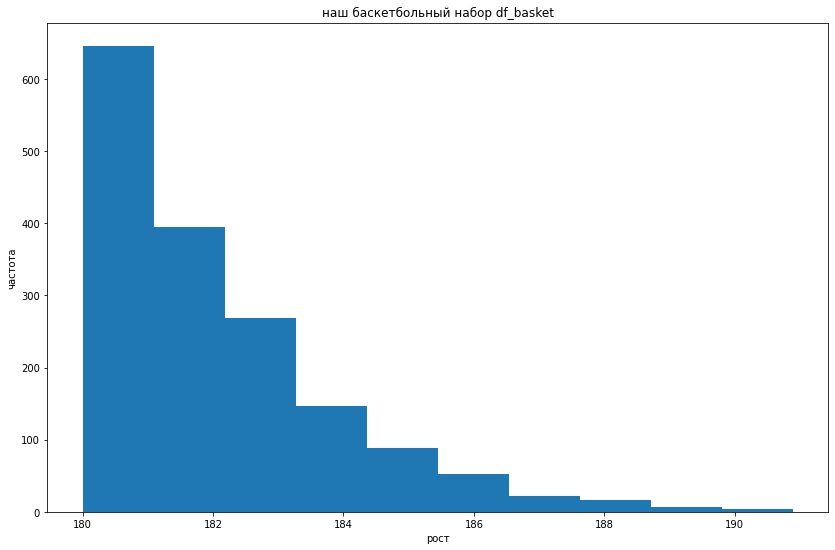

In [ ]:
plt.figure(figsize=(14, 9))


plt.hist(df_basket['height_sm'], color='blue')
plt.title("наш баскетбольный набор df_basket")
plt.xlabel("рост")
plt.ylabel("частота")
plt.hist(df_basket['height_sm'])

мы видим сильный правый перекос, и действительно, перекос больше 0.

In [ ]:
df_basket['height_sm'].skew()

1.4368712109307635

тогда как в основном наборе перекос близок к 0.

In [ ]:
df['height_sm'].skew()

-0.005709810553796883

эксцесс показывает вытянута ли гистограмма вверх

Если он > 0, то распределение является слишком высоким («островершинным»)

Если же < 0  – то слишком низким и пологим. 

И чем больше он  по модулю, тем «аномальнее» высота в ту или иную сторону.

Видно, что наша исходная выборка бм нормальна, а выборка с номером 1 - слишком пологая

(array([1323., 1393., 1566., 1581., 1691., 1588., 1623., 1458., 1351.,
        1188.]), array([169.0002208 , 169.79980518, 170.59938956, 171.39897394,
        172.19855832, 172.9981427 , 173.79772708, 174.59731146,
        175.39689584, 176.19648022, 176.9960646 ]), <a list of 10 Patch objects>)

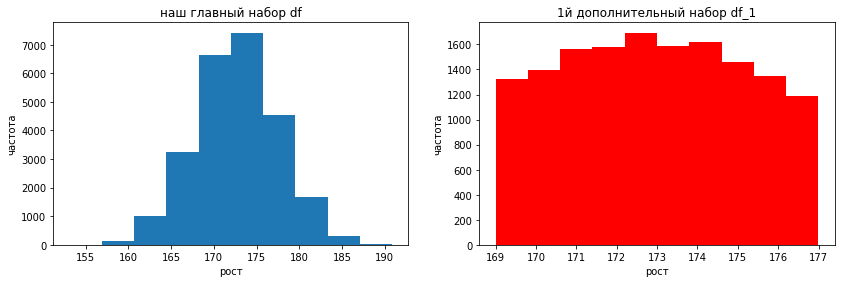

In [ ]:
plt.figure(figsize=(14, 9))

plt.subplot(2, 2, 1)

plt.hist(df['height_sm'], color='blue')
plt.title("наш главный набор df")
plt.xlabel("рост")
plt.ylabel("частота")
plt.hist(df['height_sm'])

plt.subplot(2, 2, 2)
plt.title("1й дополнительный набор df_1")
plt.xlabel("рост")
plt.ylabel("частота")
plt.hist(df_1['height_sm'], color='red')


In [ ]:
print('эксцесс основного набора - ',df['height_sm'].kurt())
print('эксцесс дополнительного набора - ' , df_1['height_sm'].kurt())

эксцесс основного набора -  -0.03508983378557495
эксцесс дополнительного набора -  -1.0952046419430972


Асимметрия характеризует меру скошенности графика влево / вправо, а эксцесс –  меру его высоты.


Слишком большие по модулю эксцесс и перекос заставляют заподозрить неоднородность и искусственную смещенность в данных.

## Что еще мы можем узнать по этим данным?

Как вы думаете, зависит ли вес человека от его роста?

Вернемся к нашей основной таблице и построим точечную диаграмму зависимости веса от роста по нашим данным.

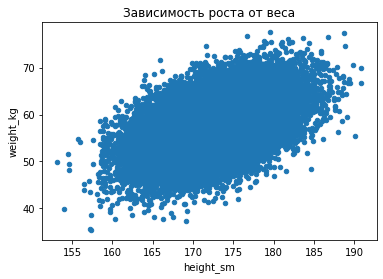

In [ ]:
df.plot.scatter(x='height_sm', y='weight_kg', title='Зависимость роста от веса')

Прослеживается явная линейная зависимость веса от роста, то есть, чем больше рост, тем более-менее, больше вес человека.

Это вполне естественно.

Как выразить такие зависимости в числе?

Для этого существует еще одно понятие - коэффициент корреляции или просто корреляция.

Коэффициент корреляции выражает линейную зависимость одной величины от другой.

Чем выше по модулю корреляция, чем больше выражена линейная зависимость.

Если корреляция положительна, то зависимость прямая (чем больше одна величина, тем больше и другая). Например чем больше времени тренируешься, тем выше результаты.

Если корреляция отрицательна, то зависимость обратная. Например, чем больше врешь, тем меньше тебе верят.

Самая высокая корреляция между величинами равна 1. Это значит, что 2 величины зависят друг от друга полностью линейно, и график зависимости является прямой.

Допустим, мы хотим посчитать коэффициент корреляции между величинами X и Y в выборке.
Это сделать можно по формуле (см презентацию)


Формула непростая, но, к счастью, библиотека Pandas может сделать расчет за нас:

In [ ]:
df.corr()

,Index,Height,Weight,height_sm,weight_kg
Index,1.000000,0.009657,-0.007270,0.009657,-0.007270
Height,0.009657,1.000000,0.502852,1.000000,0.502852
Weight,-0.007270,0.502852,1.000000,0.502852,1.000000
height_sm,0.009657,1.000000,0.502852,1.000000,0.502852
weight_kg,-0.007270,0.502852,1.000000,0.502852,1.000000


Посмотрите на матрицу корреляций.

В каждой ее ячейке записана корреляция между величиной в строке и величиной в столбце.

По диагонали матрицы стоят 1. Это естественно, так как величина зависит линейно от самой себя.

Между индексом и всеми другими величинами корреляция очень низкая, естественно, между номером человека в выборке и его ростом и весом нет никакой зависимости.

Между ростом человека в дюймах и его ростом в сантиметрах корреляция равна 1. Это тоже естественно, так как ростом в сантиметрах пересчитывается из роста в дюймах по линейной формуле.

Тоже самое касается веса в фунтах и килограммах.

А вот корреляции между ростом и весом равны примерно 0.5. Это значит, что между этими величинами существует выраженная, но не чистая линейная зависимость.

Матрица корреляций очень помогает в исследовании данных, мы в дальнейшем в этом убедимся.



Более удобно смотреть на матрицу корреляций в виде тепловой карты. 

Интенсивность цвета отображает величину корреляции, красный тон говорит о положительной корреляции, а синий - об отрицательной.

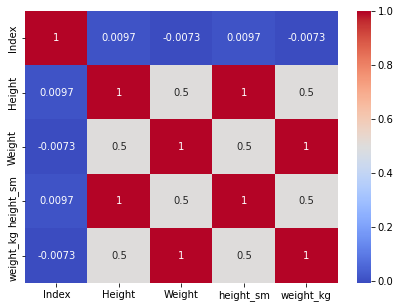

In [ ]:
correlation = df.corr()
plt.figure(figsize=(7, 5))
plt.tight_layout()
sns.heatmap(correlation , annot = True, cmap = 'coolwarm')

## Итак, мы посчитали по всем жильцам санатория для их роста и веса средние значения, медианы, максимумы, минимумы, стандартные отклонения и квантили. Посмотрели на гистограмму. 


## Однако, что же нам сказать директору? Ему нужны выводы.

Можно ли, зная рост и вес человека, понять, есть ли у него лишний вес, или, наоборот, недостаток веса?
Это сложно, так как, очевидно, здоровый человек будет весить тем больше, чем он выше, но сложно по 2м цифрам понять, у него есть лишний вес, или еще нет.

А что будет, если мы разделим вес человека на его рост?
Или, еще лучше, как принято - разделим вес человека на квадрат его роста в метрах.

Мы, как раз, получим показатель, который будет отражать как вес распределяется по росту. 

Этот показатель называется ИМТ - индекс массы тела. По английски он называется body mass index (BMI). 

Давайте добавим новую колонку с BMI в наши данные.

In [ ]:
df['BMI'] = df['weight_kg']/(df['height_sm']/100 * df['height_sm']/100)

Теперь давайте спросим гугл о том, какие есть нормы на индекс массы тела:

Информация есть только для взрослых, нормы здоровья подростков зависят еще от пола и возраста. Но так как у нас этой информации нет, будем пользоваться этими нормами:


Расчет и значение показателей ИМТ

    Недостаточный вес: ИМТ менее 18,5. 
    Нормальный вес: ИМТ от 18,5 до 24,9. 
    Избыточный вес: ИМТ от 25 до 29,9. 
    Ожирение: ИМТ от 30 и выше.

Давайте добавим эти градации в нашу таблицу. Назовем колонку - weight indicator

In [ ]:
df.loc[df['BMI'] < 18.5, 'weight indicator'] = 'low'
df.loc[(df['BMI'] >= 18.5) & (df['BMI'] < 24.9), 'weight indicator'] = 'norm'
df.loc[(df['BMI'] >= 24.9) & (df['BMI'] < 29.9), 'weight indicator'] = 'high'
df.loc[df['BMI'] > 29.9, 'weight indicator'] = 'fat'

Посмотрим на колонку индикатора и на гистограмму по ней.


In [ ]:
df.head(5)

,Index,Height,Weight,height_sm,weight_kg,BMI,weight indicator
0,1,65.78331,112.9925,167.089607,51.252494,18.357609,low
1,2,71.51521,136.4873,181.648633,61.909547,18.762615,norm
2,3,69.39874,153.0269,176.272800,69.411778,22.338940,norm
3,4,68.21660,142.3354,173.270164,64.562199,21.504569,norm
4,5,67.78781,144.2971,172.181037,65.452010,22.077625,norm


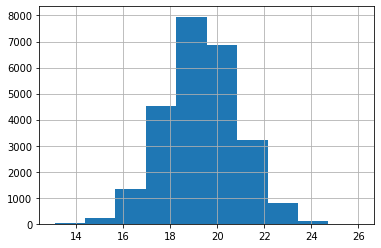

In [ ]:
df['BMI'].hist()

По гистограмме видно, что в нашей группе большинство людей имеют нормальный вес, есть некоторое количество с недостаточным весом, и совсем немного с избыточным.

Людей с ожирением в нашей группе нет.

Посмотрим, сколько получилось каких значений:

In [ ]:
df['weight indicator'].value_counts()

norm    17552
low      7443
high        6
Name: weight indicator, dtype: int64

Это поле 'weight indicator' уже не является числом, а принимает значения из ограниченного набора.
Такие данные называются категориальными.

Теперь мы можем посчитать еще одну характеристику, которая имеет смысл, только для категориальных данных.

Это Мода - наиболее частое значение.

Мы сразу можем сказать, что в нашем случае Мода = 'norm'

А в библиотеке Pandas посчитать ее можно вот так:

In [ ]:
df['weight indicator'].mode()

0    norm
dtype: object

Вот теперь мы можем составить отчет для директора.

Давайте посчитаем, какой процент людей имеет те или иные индикаторы (например, чтобы узнать процент людей с низким весом мы разделим количество этих людей на количество всех людей в группе):

In [ ]:
low_weight_ratio = len(df[df['weight indicator'] == 'low'])/len(df)
norm_weight_ratio = len(df[df['weight indicator'] == 'norm'])/len(df)
high_weight_ratio = len(df[df['weight indicator'] == 'high'])/len(df)
  
print(f'недостаточный вес имеют {low_weight_ratio*100}%')
print(f'нормальный вес имеют {norm_weight_ratio*100}%')
print(f'избыточный вес имеют {high_weight_ratio*100}%')

недостаточный вес имеют 29.770809167633296%
нормальный вес имеют 70.2051917923283%
избыточный вес имеют 0.023999040038398464%


Теперь директор знает, что примерно 30% питания должно быть более калорийным, 70% - нормальным, и всего 6 порций - низкокалорийным.

## На этом уроке мы попробовали сделать первичный анализ данных, узнали про такие характеристики данных как среднее, медиана, квантили, стандартное отклонение и мода. Узнали про категореальные данные. Научились строить и анализировать гистограммы, искать зависимости и делать выводы по данным.

Подумайте над вопросом - почему, когда мы убрали из данных такой огромный выброс - 16-метрового человека, среднее значение роста почти не изменилось.

Придумайте примеры наборов данных с зарплатой людей, с высоким и низким эксцессом, левым и правым перекосом.

Если чувствуете для себя полезным, напишите на языке Python несколько функций (сколько захочется): которые по массиву натуральных чисел считают среднее арифметическое, медиану, моду, квантили.